# Deep learning Assignment 2 -Hidden Layers & Back propagation
## Author: Xiao Jing (xj655)

## 0. Setup

In [174]:
# Import dependencies
import torch
import torch.nn as nn
import torch.optim as optim
from plot_lib import set_default, show_scatterplot, plot_bases, plot_data
from matplotlib.pyplot import plot, title, axis, legend

In [26]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [27]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

## 1. Data generation
#### You'll be creating data points that are generated from a particular function.

### 1.1 Quadratic: $y = f(x) = x^2$

In [65]:
# Implement the function below
def quadratic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to x^2 using torch.pow() 
    
    The function should return: x, y
    """
    
    x = -1+ 1e-12+torch.rand(n_samples,1)*2
    y = x.pow(2)
    return x.to(device), y.to(device)

In [66]:
# Generate the data with 
n_samples = 128
x_quadr, y_quadr = quadratic_data_generator(n_samples)

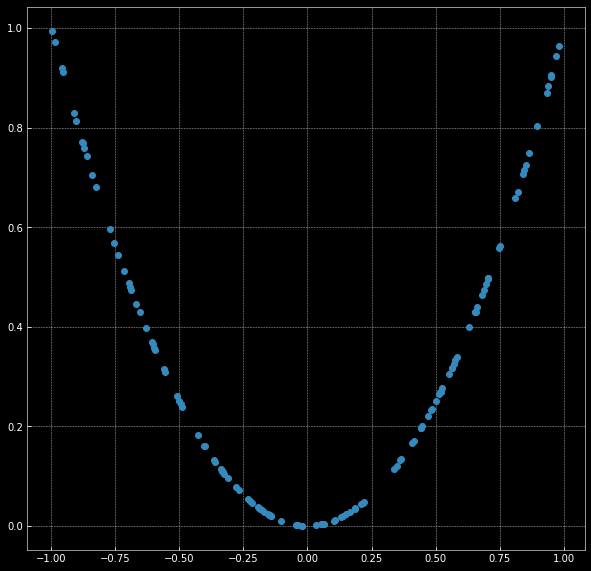

In [67]:
# Visualize the data
set_default()
plot(x_quadr.numpy(), y_quadr.numpy(),'o')

### 1.2 Cubic: $y = f(x) = x^3 - 0.5x$

In [69]:
# Implement the function below
def cubic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to (x^3 - 0.5x) using torch.pow() and torch.mul() 
    
    The function should return: x, y
    """
    x =  -1+ 1e-12+torch.rand(n_samples,1)*2
    y = x.pow(3) - x.mul(0.5)
    return x.to(device), y.to(device)

In [75]:
# Generate the data with n_samples = 128
x_cubic, y_cubic  = cubic_data_generator(n_samples=128)

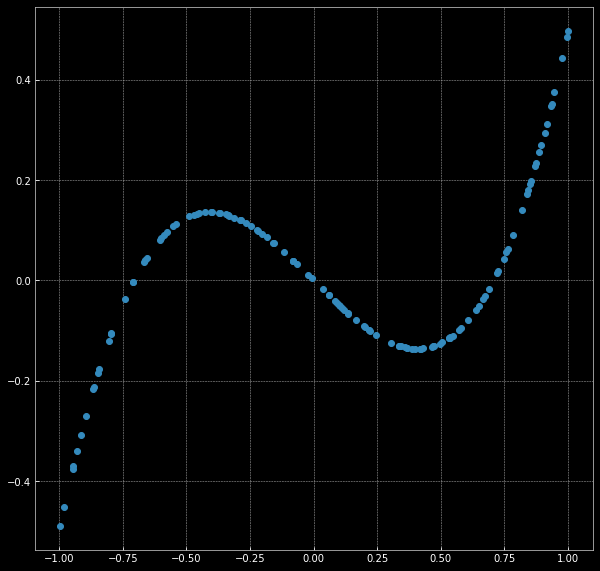

In [76]:
# Visualize the data 
plot(x_cubic.numpy(), y_cubic.numpy(),'o')

### 1.3 Sine: $y = f(x) = \sin(2.5x)$

In [78]:
# Implement the function below
def sine_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to sin(2.5 * x) using torch.sin() 
    
    The function should return: x, y
    """
    x =  -1+ 1e-12+torch.rand(n_samples,1)*2
    y =  torch.sin(x.mul(2.5))
    return x.to(device), y.to(device)

In [79]:
# Generate the data with n_samples = 128
x_sine, y_sine = sine_data_generator(n_samples)

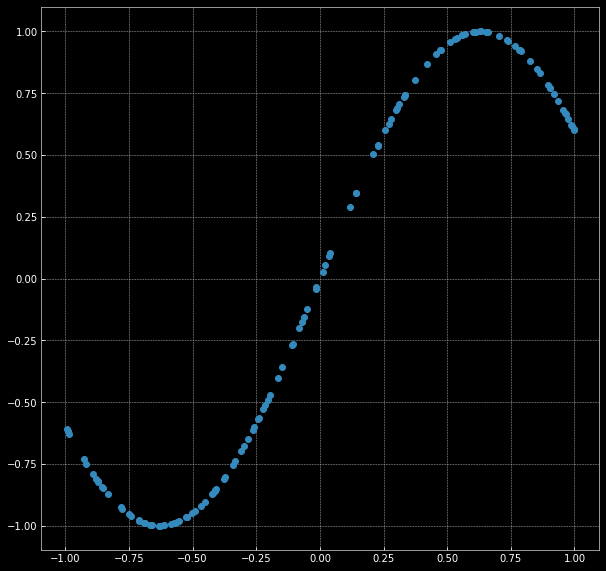

In [80]:
# Visualize the data 
plot(x_sine.numpy(), y_sine.numpy(),'o')

### 1.4 Absolute value: $y = f(x) = |x|$

In [81]:
# Implement the function below
def abs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to |x| using torch.abs() 
    
    The function should return: x, y
    """
    x =  -1+ 1e-12+torch.rand(n_samples,1)*2
    y =  torch.abs(x)
    return x.to(device), y.to(device)

In [82]:
# Generate the data with n_samples = 128
x_abs, y_abs = abs_data_generator(n_samples)

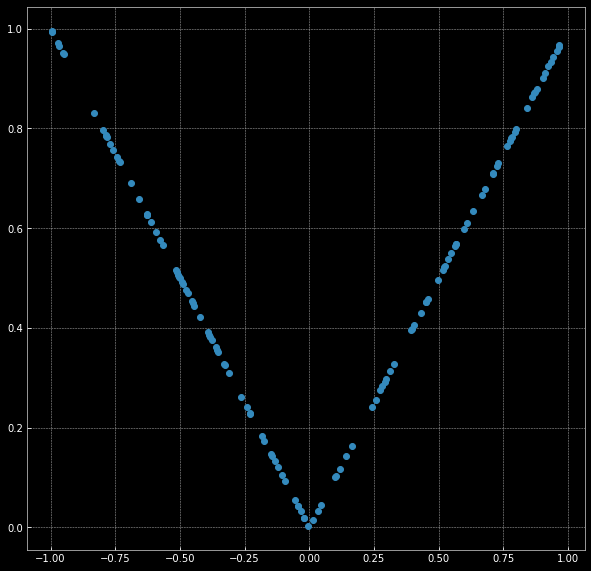

In [83]:
# Visualize the data 
plot(x_abs.numpy(), y_abs.numpy(),'o')

### 1.5 Heavyside Step Function: $y = f(x) = \begin{cases} 0, & x < 0 \\ 1, & x \geq 0 \end{cases}$

In [116]:
# Implement the function below
def hs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to the Heavyside Step Function using a condition.
    Make sure that y is a torch.FloatTensor.
    
    The function should return: x, y
    """
    x =  -1+ 1e-12+torch.rand(n_samples,1)*2
    y =  x.ceil()
    return x.to(device), y.to(device)

In [117]:
# Generate the data with n_samples = 128
x_hs, y_hs = hs_data_generator(n_samples)

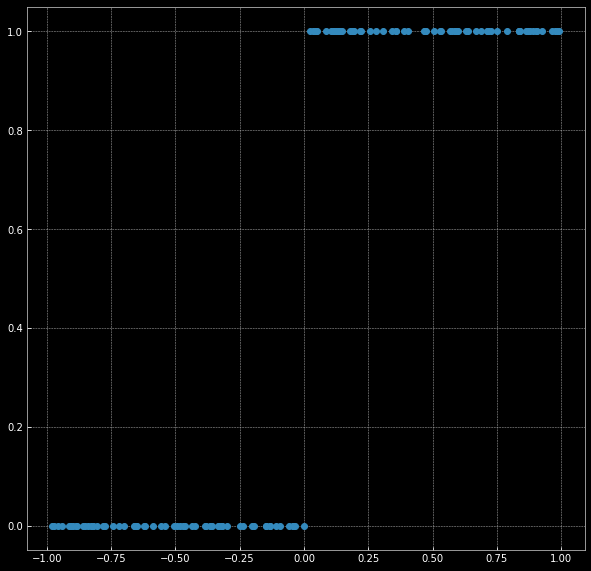

In [119]:
# Visualize the data 
plot(x_hs.numpy(),y_hs.numpy(),'o')

## 2. Models
#### You are going to approximate the functions above with fully connected models of different depths.  

### 2.1. Dimensionality
The models you define below will be predicting $y$ from $x$ and will use the data generated in Part 1 as training data. Fill in the input and output dimensions for each of the models.

Hint: These dimensions are independent from the number of samples. 

In [143]:
input_dim = 1
output_dim =1

### 2.2. No Hidden 
Define a model with a single linear module `torch.nn.Linear(input_dim, output_dim)` and no non-linearity.

In [205]:
class Linear_0H(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Linear_0H, self).__init__()# same as super().method
        #self.input_dim = input_dim
        self.network = nn.Sequential(nn.Linear(input_dim,output_dim)) 
        

    def forward(self, x):
        #x = x.view(-1, self.input_dim)
        return self.network(x)

In [206]:
mod0H = Linear_0H(input_dim, output_dim)

In [207]:
mod0H(x_abs).shape

torch.Size([128, 1])

### 2.2. One Hidden 
Define a model with a single hidden layer of size 3 and one ReLU non-linearity.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(intput_dim, 3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [147]:
class Linear_1H(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Linear_1H, self).__init__()
        self.input_dim = input_dim
        self.network = nn.Sequential(
            nn.Linear(input_dim, 3, bias=False),
            nn.ReLU(),
            nn.Linear(3, output_dim, bias=False)
        )
    
        pass

    def forward(self, x):
        x = x.view(-1, self.input_dim)
        return self.network(x) 

### 2.3. Two Hidden 
Define a model with a two hidden layers of size 3 and two ReLU non-linearities.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(input_dim,3)` -> `nn.ReLU()` -> `nn.Linear(3,3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [148]:
class Linear_2H(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Linear_2H, self).__init__()
        self.input_dim = input_dim
        self.network = nn.Sequential(
            nn.Linear(input_dim, 3, bias=False),
            nn.ReLU(),
            nn.Linear(3, 3, bias=False),
            nn.ReLU(),
            nn.Linear(3, output_dim, bias=False)
        )
        
        pass

    def forward(self, x):
        x = x.view(-1, self.input_dim)
        return self.network(x) 

In [149]:
L_2y = Linear_2H(input_dim, output_dim)

In [217]:
#L_2y(x_hs)

## 3. Training

### 3.1 Train method
You are going to implement a training method which takes a model, number of epochs, training data, and threshold for loss functions as input and returns the (detached) predicitons from the last epoch. 

Make sure you understand what the method is doing and how early stopping works in this case.

In [218]:
# Training function
def train(model, epochs, x, y, loss_threshold=1e-2):
    # Set model to training mode
    model.train()
    
    # Define Mean Squared Error as loss function using nn.MSELoss()
    critereon = nn.MSELoss()
    
    # Define the SGD optimizer with learning rate of 0.01 using torch.optim.SGD()
    optimizer = optim.SGD(model.parameters(), lr = 0.01)
    
    # Training loop
    for epoch in range(epochs):
        # Forward data through model ## input x ---trained--- output y
        y_pred = model.forward(x)
        
        # Compute the loss           ## output y ---compared with--- real y
        loss = critereon(y_pred,y)
        
        # Zero-out the optimizer 
        optimizer.zero_grad()
        
        # Backpropagate loss
        loss.backward()
        
        # Make a step with the optimizer
        optimizer.step()
        
        # Uncomment lines below once you implement the code above
        # Print out loss every 100 epochs 
        if epoch == 0 or (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
        
        # Uncomment lines below once you implement the code above
        # Early stopping based on training loss
        if loss.item() < loss_threshold:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            break    
        
        #pass # remove once implemented
    
    # Return predictions from the last epoch.
    # Uncomment line below once you implement
    return y_pred.detach()

### 3.2. `Linear_0H`

In [219]:
# Define model
model_0H = Linear_0H(input_dim,output_dim).to(device)

In [227]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred1 = train(model_0H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.09157849103212357
Epoch 100 loss: 0.09157849103212357
Epoch 200 loss: 0.09157849103212357
Epoch 300 loss: 0.09157849103212357
Epoch 400 loss: 0.09157849103212357
Epoch 500 loss: 0.09157849103212357
Epoch 600 loss: 0.09157849103212357
Epoch 700 loss: 0.09157849103212357
Epoch 800 loss: 0.09157849103212357
Epoch 900 loss: 0.09157849103212357
Epoch 1000 loss: 0.09157849103212357
Epoch 1100 loss: 0.09157849103212357
Epoch 1200 loss: 0.09157849103212357
Epoch 1300 loss: 0.09157849103212357
Epoch 1400 loss: 0.09157849103212357
Epoch 1500 loss: 0.09157849103212357
Epoch 1600 loss: 0.09157849103212357
Epoch 1700 loss: 0.09157849103212357
Epoch 1800 loss: 0.09157849103212357
Epoch 1900 loss: 0.09157849103212357
Epoch 2000 loss: 0.09157849103212357
Epoch 2100 loss: 0.09157849103212357
Epoch 2200 loss: 0.09157849103212357
Epoch 2300 loss: 0.09157849103212357
Epoch 2400 loss: 0.09157849103212357
Epoch 2500 loss: 0.09157849103212357
Epoch 2600 loss: 0.09157849103212357
Epoch 2700 lo

No handles with labels found to put in legend.


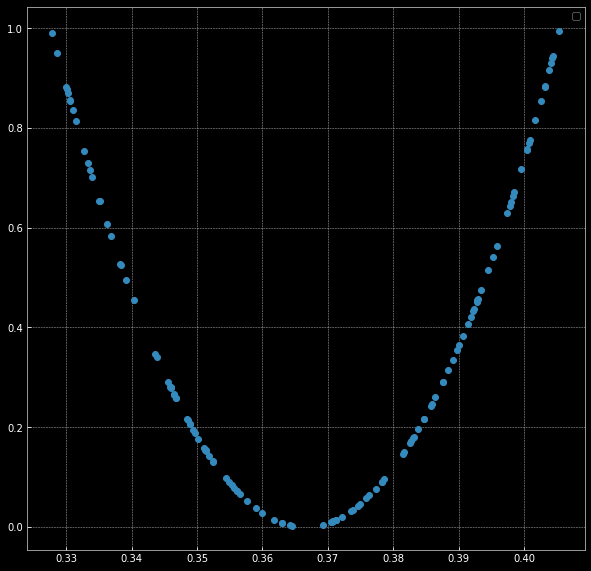

In [246]:
# Plot predictions vs actual data
plot( y_pred1.numpy(),y_quadr.numpy(),'o')
legend()

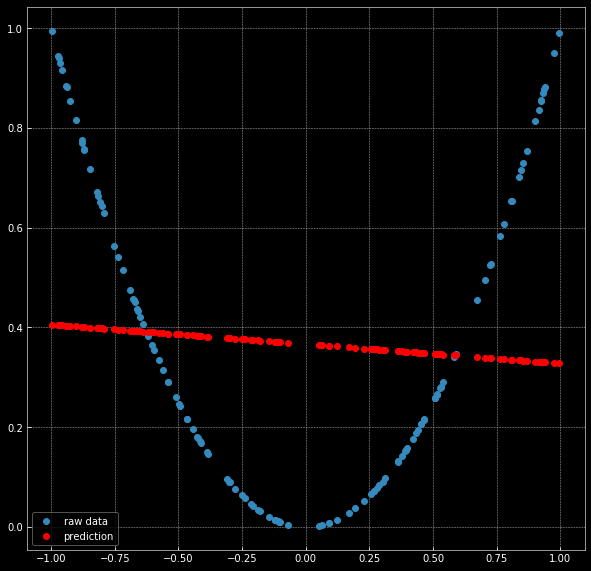

In [236]:
plot(x_quadr.numpy(), y_quadr.numpy(),'o',label='raw data')
plot(x_quadr.numpy(),y_pred1.numpy(),'ro',label='prediction')
legend()

In [237]:
# Define model
model_0H = Linear_0H(input_dim,output_dim).to(device)

In [238]:
# Train model on cubic data for 10000 epochs and loss_threshold=1e-2
y_pred2 = train(model_0H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.23865316808223724
Epoch 100 loss: 0.07060988247394562
Epoch 200 loss: 0.03637123107910156
Epoch 300 loss: 0.027667615562677383
Epoch 400 loss: 0.025412946939468384
Epoch 500 loss: 0.024828141555190086
Epoch 600 loss: 0.02467644214630127
Epoch 700 loss: 0.024637091904878616
Epoch 800 loss: 0.02462688460946083
Epoch 900 loss: 0.024624237790703773
Epoch 1000 loss: 0.024623550474643707
Epoch 1100 loss: 0.02462337352335453
Epoch 1200 loss: 0.0246233269572258
Epoch 1300 loss: 0.024623313918709755
Epoch 1400 loss: 0.024623312056064606
Epoch 1500 loss: 0.024623310193419456
Epoch 1600 loss: 0.024623310193419456
Epoch 1700 loss: 0.024623310193419456
Epoch 1800 loss: 0.024623310193419456
Epoch 1900 loss: 0.024623310193419456
Epoch 2000 loss: 0.024623310193419456
Epoch 2100 loss: 0.024623310193419456
Epoch 2200 loss: 0.024623310193419456
Epoch 2300 loss: 0.024623310193419456
Epoch 2400 loss: 0.024623310193419456
Epoch 2500 loss: 0.024623310193419456
Epoch 2600 loss: 0.0246233101934

No handles with labels found to put in legend.


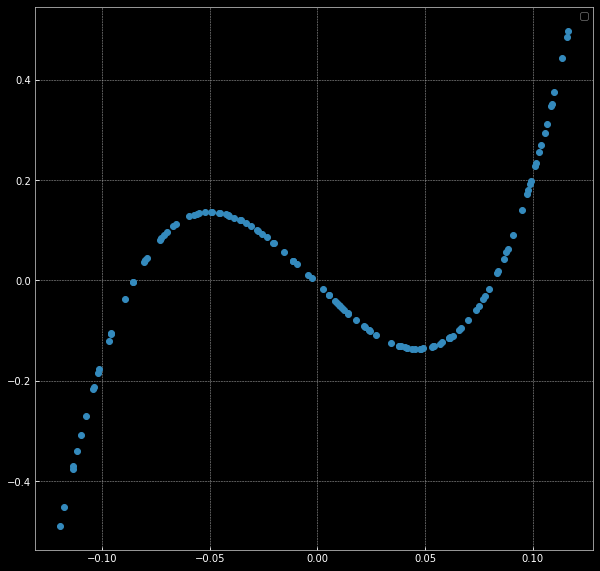

In [245]:
# Plot predictions vs actual data
plot(y_pred2.numpy(), y_cubic.numpy(),'o')
legend()

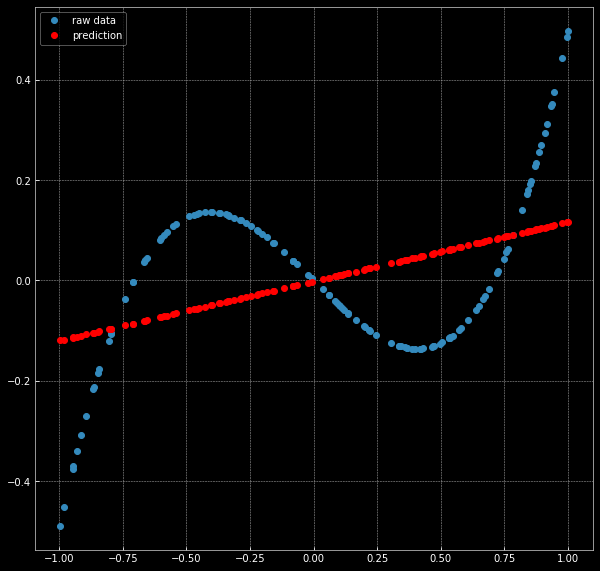

In [240]:
plot(x_cubic.numpy(), y_cubic.numpy(),'o',label='raw data')
plot(x_cubic.numpy(),y_pred2.numpy(),'ro',label='prediction')
legend()

In [241]:
# Define model
model_0H = Linear_0H(input_dim,output_dim).to(device)

In [242]:
# Train model on sine data for 10000 epochs and loss_threshold=1e-2
y_pred3 = train(model_0H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.5451928973197937
Epoch 100 loss: 0.11455461382865906
Epoch 200 loss: 0.09156545996665955
Epoch 300 loss: 0.08766084909439087
Epoch 400 loss: 0.08678224682807922
Epoch 500 loss: 0.08657939732074738
Epoch 600 loss: 0.08653246611356735
Epoch 700 loss: 0.08652161061763763
Epoch 800 loss: 0.08651909977197647
Epoch 900 loss: 0.08651851862668991
Epoch 1000 loss: 0.08651838451623917
Epoch 1100 loss: 0.08651834726333618
Epoch 1200 loss: 0.08651834726333618
Epoch 1300 loss: 0.08651833981275558
Epoch 1400 loss: 0.08651833981275558
Epoch 1500 loss: 0.08651834726333618
Epoch 1600 loss: 0.08651834726333618
Epoch 1700 loss: 0.08651834726333618
Epoch 1800 loss: 0.08651834726333618
Epoch 1900 loss: 0.08651834726333618
Epoch 2000 loss: 0.08651834726333618
Epoch 2100 loss: 0.08651834726333618
Epoch 2200 loss: 0.08651834726333618
Epoch 2300 loss: 0.08651834726333618
Epoch 2400 loss: 0.08651834726333618
Epoch 2500 loss: 0.08651834726333618
Epoch 2600 loss: 0.08651834726333618
Epoch 2700 los

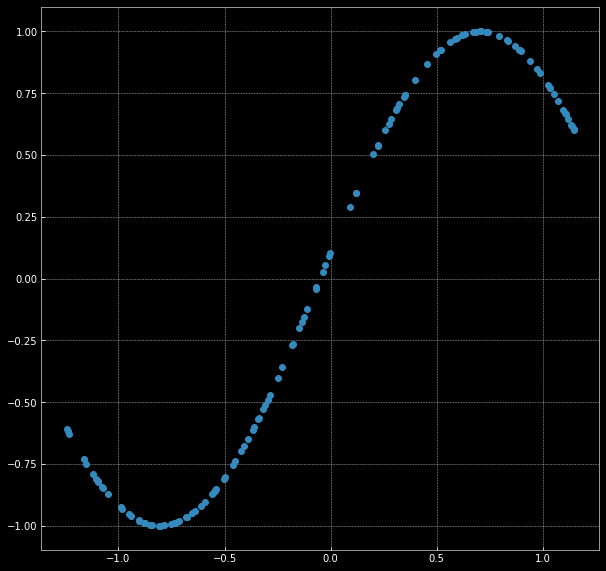

In [243]:
plot(y_pred3.numpy(), y_sine.numpy(),'o')

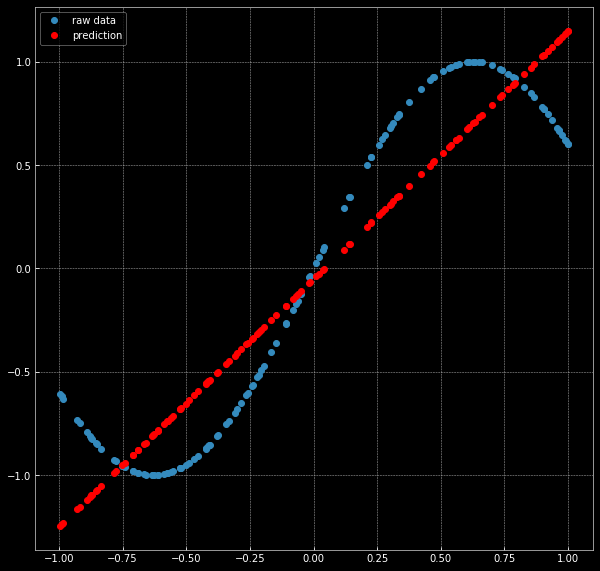

In [244]:
# Plot predictions vs actual data
plot(x_sine.numpy(), y_sine.numpy(),'o',label='raw data')
plot(x_sine.numpy(),y_pred3.numpy(),'ro',label='prediction')
legend()

In [247]:
# Define model
model_0H = Linear_0H(input_dim,output_dim).to(device)

In [250]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred4 = train(model_0H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.07910297065973282
Epoch 100 loss: 0.07910297065973282
Epoch 200 loss: 0.07910297065973282
Epoch 300 loss: 0.07910297065973282
Epoch 400 loss: 0.07910297065973282
Epoch 500 loss: 0.07910297065973282
Epoch 600 loss: 0.07910297065973282
Epoch 700 loss: 0.07910297065973282
Epoch 800 loss: 0.07910297065973282
Epoch 900 loss: 0.07910297065973282
Epoch 1000 loss: 0.07910297065973282
Epoch 1100 loss: 0.07910297065973282
Epoch 1200 loss: 0.07910297065973282
Epoch 1300 loss: 0.07910297065973282
Epoch 1400 loss: 0.07910297065973282
Epoch 1500 loss: 0.07910297065973282
Epoch 1600 loss: 0.07910297065973282
Epoch 1700 loss: 0.07910297065973282
Epoch 1800 loss: 0.07910297065973282
Epoch 1900 loss: 0.07910297065973282
Epoch 2000 loss: 0.07910297065973282
Epoch 2100 loss: 0.07910297065973282
Epoch 2200 loss: 0.07910297065973282
Epoch 2300 loss: 0.07910297065973282
Epoch 2400 loss: 0.07910297065973282
Epoch 2500 loss: 0.07910297065973282
Epoch 2600 loss: 0.07910297065973282
Epoch 2700 lo

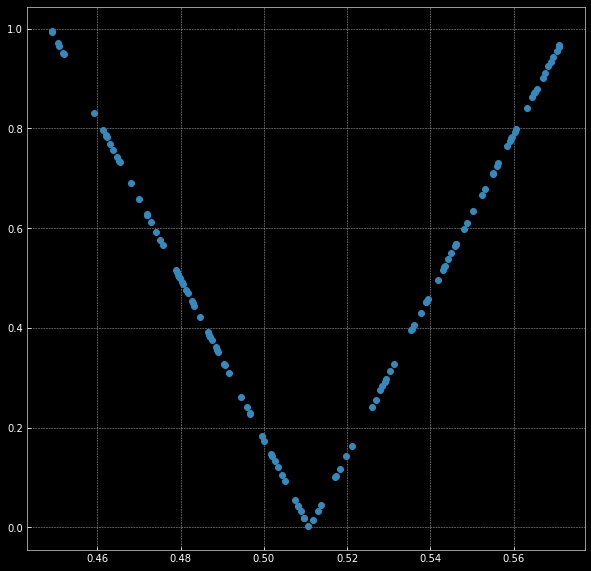

In [251]:
# Plot predictions vs actual data
plot(y_pred4.numpy(), y_abs.numpy(),'o')

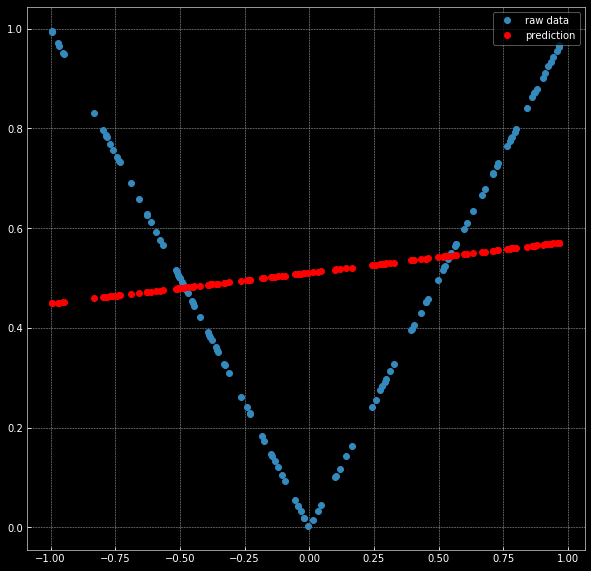

In [252]:
plot(x_abs.numpy(), y_abs.numpy(),'o',label='raw data')
plot(x_abs.numpy(),y_pred4.numpy(),'ro',label='prediction')
legend()

In [253]:
# Define model
model_0H = Linear_0H(input_dim,output_dim).to(device)

In [255]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred5 = train(model_0H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.06436257809400558
Epoch 100 loss: 0.06436257809400558
Epoch 200 loss: 0.06436257809400558
Epoch 300 loss: 0.06436257809400558
Epoch 400 loss: 0.06436257809400558
Epoch 500 loss: 0.06436257809400558
Epoch 600 loss: 0.06436257809400558
Epoch 700 loss: 0.06436257809400558
Epoch 800 loss: 0.06436257809400558
Epoch 900 loss: 0.06436257809400558
Epoch 1000 loss: 0.06436257809400558
Epoch 1100 loss: 0.06436257809400558
Epoch 1200 loss: 0.06436257809400558
Epoch 1300 loss: 0.06436257809400558
Epoch 1400 loss: 0.06436257809400558
Epoch 1500 loss: 0.06436257809400558
Epoch 1600 loss: 0.06436257809400558
Epoch 1700 loss: 0.06436257809400558
Epoch 1800 loss: 0.06436257809400558
Epoch 1900 loss: 0.06436257809400558
Epoch 2000 loss: 0.06436257809400558
Epoch 2100 loss: 0.06436257809400558
Epoch 2200 loss: 0.06436257809400558
Epoch 2300 loss: 0.06436257809400558
Epoch 2400 loss: 0.06436257809400558
Epoch 2500 loss: 0.06436257809400558
Epoch 2600 loss: 0.06436257809400558
Epoch 2700 lo

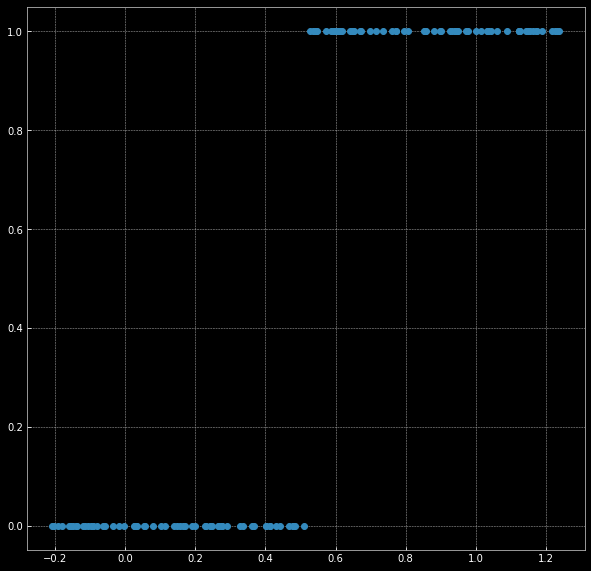

In [256]:
# Plot predictions vs actual data
plot(y_pred5.numpy(), y_hs.numpy(),'o')

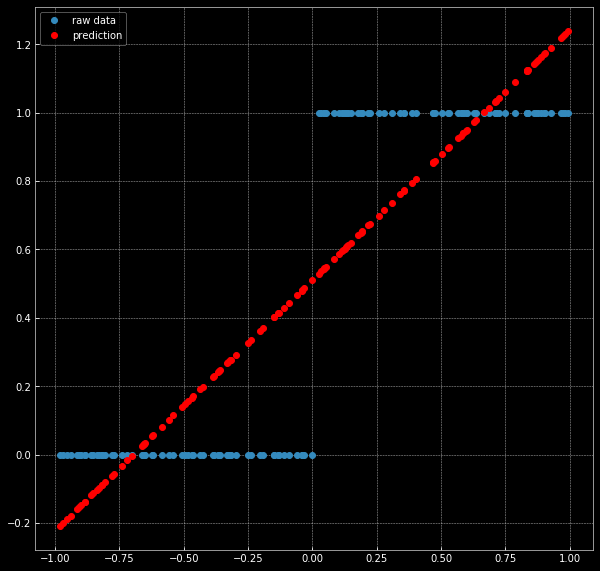

In [257]:
plot(x_hs.numpy(), y_hs.numpy(),'o',label='raw data')
plot(x_hs.numpy(),y_pred5.numpy(),'ro',label='prediction')
legend()

### 3.3. `Linear_1H`

In [259]:
# Define model
model_1H = Linear_1H(input_dim, output_dim).to(device)

In [260]:
# Train model on quadratic data for 10000 epochs and loss threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.23041675984859467
Epoch 100 loss: 0.17089831829071045
Epoch 200 loss: 0.13588528335094452
Epoch 300 loss: 0.11839363723993301
Epoch 400 loss: 0.11067229509353638
Epoch 500 loss: 0.10707630217075348
Epoch 600 loss: 0.1044531762599945
Epoch 700 loss: 0.10131021589040756
Epoch 800 loss: 0.09677762538194656
Epoch 900 loss: 0.09013655036687851
Epoch 1000 loss: 0.08083785325288773
Epoch 1100 loss: 0.06884501129388809
Epoch 1200 loss: 0.05509081110358238
Epoch 1300 loss: 0.041531551629304886
Epoch 1400 loss: 0.03032192960381508
Epoch 1500 loss: 0.02260584570467472
Epoch 1600 loss: 0.018124895170331
Epoch 1700 loss: 0.015866512432694435
Epoch 1800 loss: 0.014844441786408424
Epoch 1900 loss: 0.014415748417377472
Epoch 2000 loss: 0.014244855381548405
Epoch 2100 loss: 0.014178931713104248
Epoch 2200 loss: 0.014154023490846157
Epoch 2300 loss: 0.014144731685519218
Epoch 2400 loss: 0.014141292311251163
Epoch 2500 loss: 0.014140025712549686
Epoch 2600 loss: 0.014139560051262379
Epoch

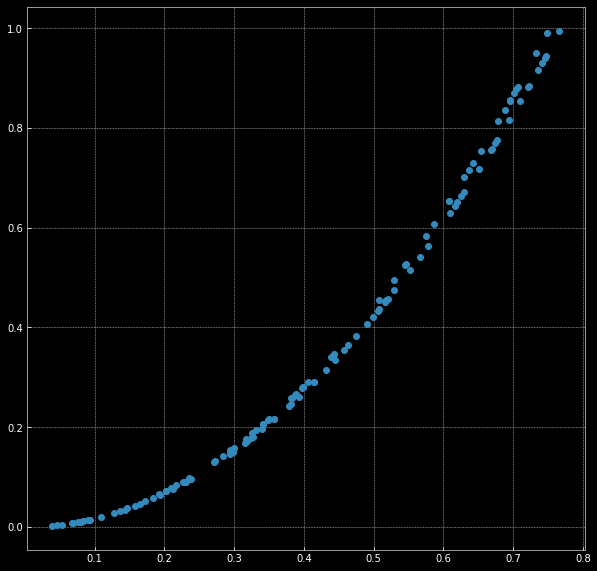

In [263]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_quadr.numpy(),'o')

In [264]:
# Define model
model_1H = Linear_1H(input_dim, output_dim).to(device)

In [265]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.031272802501916885
Epoch 100 loss: 0.028776781633496284
Epoch 200 loss: 0.027980992570519447
Epoch 300 loss: 0.027731619775295258
Epoch 400 loss: 0.027653641998767853
Epoch 500 loss: 0.027629304677248
Epoch 600 loss: 0.027621718123555183
Epoch 700 loss: 0.02761935442686081
Epoch 800 loss: 0.027618618682026863
Epoch 900 loss: 0.027618389576673508
Epoch 1000 loss: 0.027618318796157837
Epoch 1100 loss: 0.027618296444416046
Epoch 1200 loss: 0.02761828899383545
Epoch 1300 loss: 0.0276182871311903
Epoch 1400 loss: 0.0276182871311903
Epoch 1500 loss: 0.0276182871311903
Epoch 1600 loss: 0.02761828526854515
Epoch 1700 loss: 0.02761828526854515
Epoch 1800 loss: 0.0276182871311903
Epoch 1900 loss: 0.02761828526854515
Epoch 2000 loss: 0.02761828526854515
Epoch 2100 loss: 0.02761828526854515
Epoch 2200 loss: 0.0276182871311903
Epoch 2300 loss: 0.02761828526854515
Epoch 2400 loss: 0.02761828526854515
Epoch 2500 loss: 0.02761828526854515
Epoch 2600 loss: 0.02761828526854515
Epoch 2700

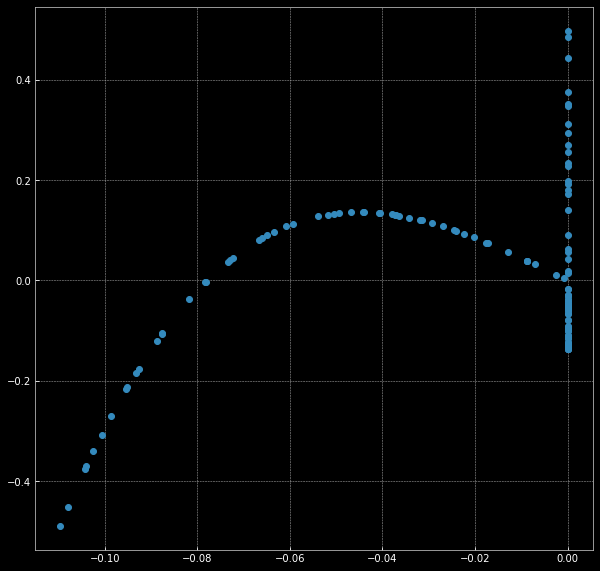

In [266]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_cubic.numpy(),'o')

In [267]:
# Define model
model_1H = Linear_1H(input_dim, output_dim).to(device)

In [268]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.794614315032959
Epoch 100 loss: 0.5395302176475525
Epoch 200 loss: 0.3553949296474457
Epoch 300 loss: 0.2077791839838028
Epoch 400 loss: 0.125869482755661
Epoch 500 loss: 0.09602078050374985
Epoch 600 loss: 0.08815562725067139
Epoch 700 loss: 0.0864643007516861
Epoch 800 loss: 0.08613752573728561
Epoch 900 loss: 0.08607743680477142
Epoch 1000 loss: 0.08606661111116409
Epoch 1100 loss: 0.08606467396020889
Epoch 1200 loss: 0.08606433123350143
Epoch 1300 loss: 0.08606426417827606
Epoch 1400 loss: 0.08606425672769547
Epoch 1500 loss: 0.08606424927711487
Epoch 1600 loss: 0.08606424927711487
Epoch 1700 loss: 0.08606424927711487
Epoch 1800 loss: 0.08606425672769547
Epoch 1900 loss: 0.08606425672769547
Epoch 2000 loss: 0.08606425672769547
Epoch 2100 loss: 0.08606425672769547
Epoch 2200 loss: 0.08606425672769547
Epoch 2300 loss: 0.08606425672769547
Epoch 2400 loss: 0.08606425672769547
Epoch 2500 loss: 0.08606425672769547
Epoch 2600 loss: 0.08606425672769547
Epoch 2700 loss: 0.08

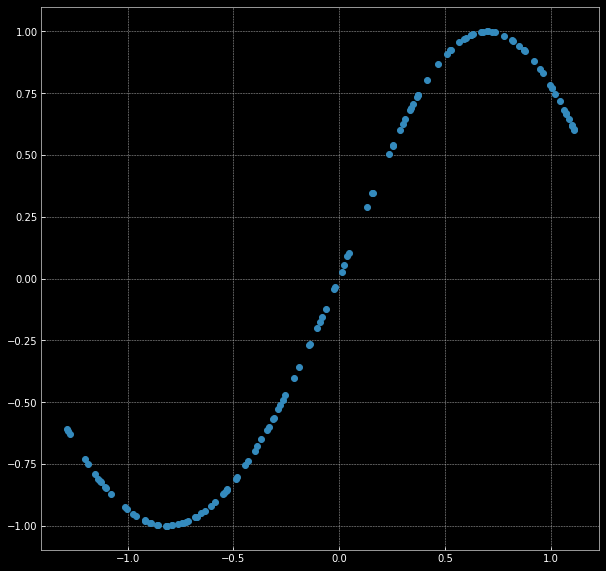

In [269]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_sine.numpy(),'o')

In [270]:
# Define model
model_1H = Linear_1H(input_dim, output_dim).to(device)

In [271]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.2532476484775543
Epoch 100 loss: 0.14748331904411316
Epoch 200 loss: 0.07732534408569336
Epoch 300 loss: 0.036775458604097366
Epoch 400 loss: 0.01564069464802742
Epoch 448 loss: 0.009938270784914494


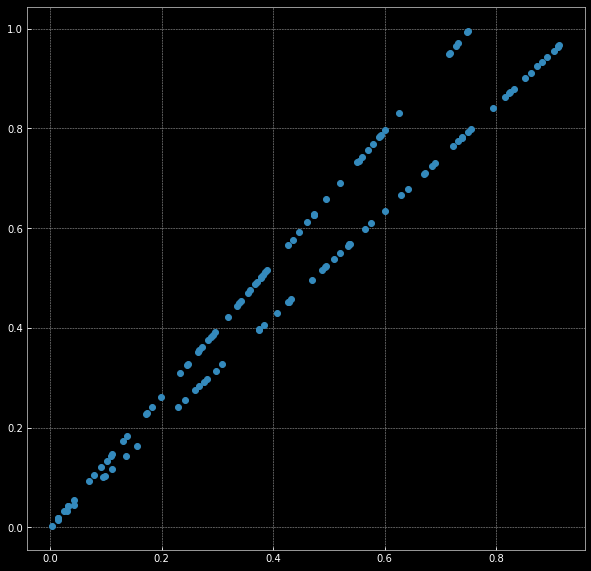

In [272]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_abs.numpy(),'o')

In [273]:
# Define model
model_1H = Linear_1H(input_dim, output_dim).to(device)

In [274]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.5912760496139526
Epoch 100 loss: 0.37463870644569397
Epoch 200 loss: 0.22983624041080475
Epoch 300 loss: 0.1611233800649643
Epoch 400 loss: 0.14316585659980774
Epoch 500 loss: 0.1400471031665802
Epoch 600 loss: 0.1395762413740158
Epoch 700 loss: 0.1394958198070526
Epoch 800 loss: 0.1394759565591812
Epoch 900 loss: 0.13946880400180817
Epoch 1000 loss: 0.13946570456027985
Epoch 1100 loss: 0.13946427404880524
Epoch 1200 loss: 0.1394636034965515
Epoch 1300 loss: 0.13946327567100525
Epoch 1400 loss: 0.1394631266593933
Epoch 1500 loss: 0.13946306705474854
Epoch 1600 loss: 0.13946302235126495
Epoch 1700 loss: 0.13946300745010376
Epoch 1800 loss: 0.13946300745010376
Epoch 1900 loss: 0.13946300745010376
Epoch 2000 loss: 0.13946300745010376
Epoch 2100 loss: 0.13946300745010376
Epoch 2200 loss: 0.13946300745010376
Epoch 2300 loss: 0.13946299254894257
Epoch 2400 loss: 0.13946299254894257
Epoch 2500 loss: 0.13946299254894257
Epoch 2600 loss: 0.13946299254894257
Epoch 2700 loss: 0.13

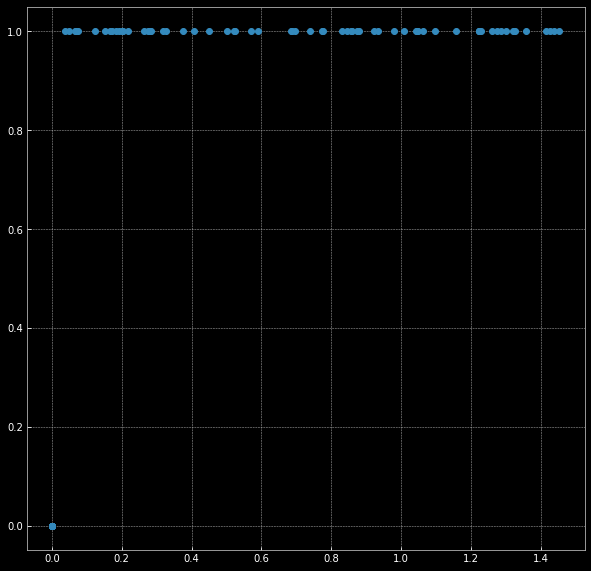

In [275]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_hs.numpy(),'o')

### 3.3. `Linear_2H`

In [276]:
# Define model
model_2H = Linear_2H(input_dim, output_dim).to(device)

In [277]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.20787031948566437
Epoch 100 loss: 0.17957013845443726
Epoch 200 loss: 0.1495923399925232
Epoch 300 loss: 0.12489638477563858
Epoch 400 loss: 0.11160095781087875
Epoch 500 loss: 0.10678797215223312
Epoch 600 loss: 0.1050153598189354
Epoch 700 loss: 0.10377246141433716
Epoch 800 loss: 0.10234911739826202
Epoch 900 loss: 0.10050120204687119
Epoch 1000 loss: 0.09803014993667603
Epoch 1100 loss: 0.09467819333076477
Epoch 1200 loss: 0.09008953720331192
Epoch 1300 loss: 0.08379829674959183
Epoch 1400 loss: 0.07528496533632278
Epoch 1500 loss: 0.0642142966389656
Epoch 1600 loss: 0.05098341405391693
Epoch 1700 loss: 0.03736215457320213
Epoch 1800 loss: 0.02614745683968067
Epoch 1900 loss: 0.01915907859802246
Epoch 2000 loss: 0.015880689024925232
Epoch 2100 loss: 0.01466695498675108
Epoch 2200 loss: 0.01428619958460331
Epoch 2300 loss: 0.014178271405398846
Epoch 2400 loss: 0.014149369671940804
Epoch 2500 loss: 0.014141862280666828
Epoch 2600 loss: 0.014139942824840546
Epoch 2700 

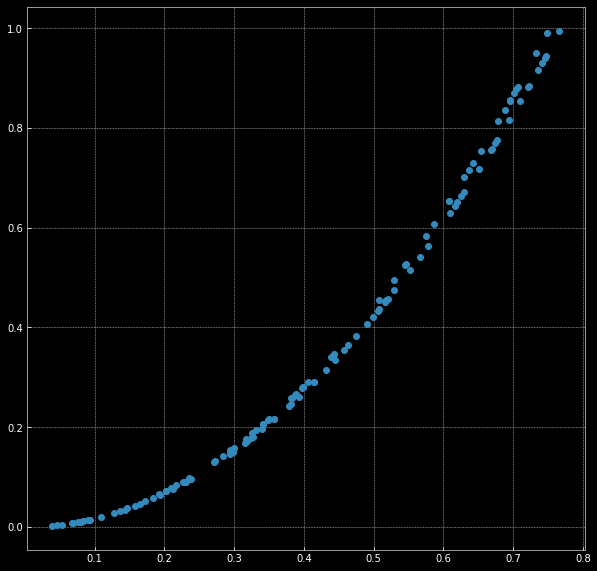

In [278]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_quadr.numpy(),'o')

In [279]:
# Define model
model_2H = Linear_2H(input_dim, output_dim).to(device)

In [280]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.027994098141789436
Epoch 100 loss: 0.027912002056837082
Epoch 200 loss: 0.027846328914165497
Epoch 300 loss: 0.027794642373919487
Epoch 400 loss: 0.0277541633695364
Epoch 500 loss: 0.027722612023353577
Epoch 600 loss: 0.027698131278157234
Epoch 700 loss: 0.027679217979311943
Epoch 800 loss: 0.027664661407470703
Epoch 900 loss: 0.027653498575091362
Epoch 1000 loss: 0.027644967660307884
Epoch 1100 loss: 0.02763846330344677
Epoch 1200 loss: 0.02763351984322071
Epoch 1300 loss: 0.02762977033853531
Epoch 1400 loss: 0.02762693352997303
Epoch 1500 loss: 0.027624787762761116
Epoch 1600 loss: 0.027623170986771584
Epoch 1700 loss: 0.027621952816843987
Epoch 1800 loss: 0.027621036395430565
Epoch 1900 loss: 0.02762034721672535
Epoch 2000 loss: 0.027619829401373863
Epoch 2100 loss: 0.027619441971182823
Epoch 2200 loss: 0.027619151398539543
Epoch 2300 loss: 0.027618933469057083
Epoch 2400 loss: 0.02761876955628395
Epoch 2500 loss: 0.02761864848434925
Epoch 2600 loss: 0.02761855721473

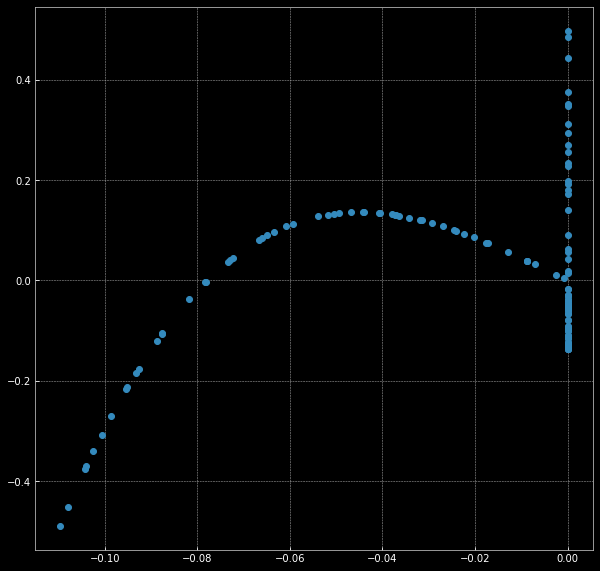

In [281]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_cubic.numpy(),'o')

In [282]:
# Define model
model_2H = Linear_2H(input_dim, output_dim).to(device)

In [283]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.6452056765556335
Epoch 100 loss: 0.6198161840438843
Epoch 200 loss: 0.5992788076400757
Epoch 300 loss: 0.5733175873756409
Epoch 400 loss: 0.5319133996963501
Epoch 500 loss: 0.46943429112434387
Epoch 600 loss: 0.4094057083129883
Epoch 700 loss: 0.38508671522140503
Epoch 800 loss: 0.3811505138874054
Epoch 900 loss: 0.38078543543815613
Epoch 1000 loss: 0.38075804710388184
Epoch 1100 loss: 0.38075610995292664
Epoch 1200 loss: 0.3807559907436371
Epoch 1300 loss: 0.3807559609413147
Epoch 1400 loss: 0.3807559609413147
Epoch 1500 loss: 0.3807559609413147
Epoch 1600 loss: 0.3807559609413147
Epoch 1700 loss: 0.3807559609413147
Epoch 1800 loss: 0.3807559609413147
Epoch 1900 loss: 0.3807559609413147
Epoch 2000 loss: 0.3807559609413147
Epoch 2100 loss: 0.3807559609413147
Epoch 2200 loss: 0.3807559609413147
Epoch 2300 loss: 0.3807559609413147
Epoch 2400 loss: 0.3807559609413147
Epoch 2500 loss: 0.3807559609413147
Epoch 2600 loss: 0.3807559609413147
Epoch 2700 loss: 0.3807559609413147

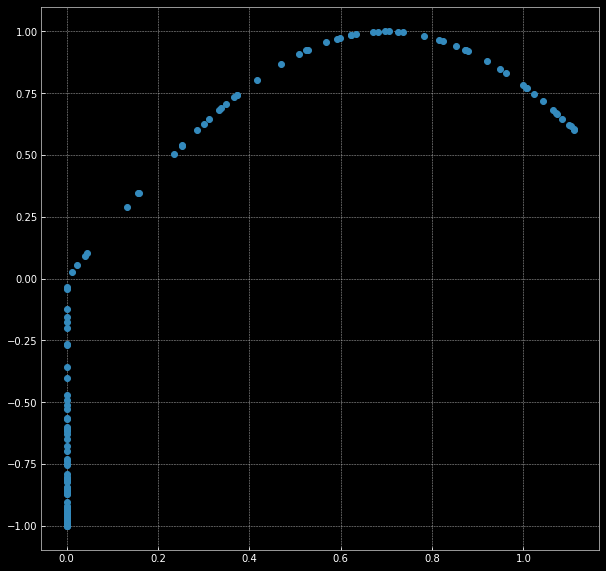

In [284]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_sine.numpy(),'o')

In [285]:
# Define model
model_2H = Linear_2H(input_dim, output_dim).to(device)

In [286]:
# Train model on abosulte value data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_2H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.5137063264846802
Epoch 100 loss: 0.39827558398246765
Epoch 200 loss: 0.3711403012275696
Epoch 300 loss: 0.35868480801582336
Epoch 400 loss: 0.3516005873680115
Epoch 500 loss: 0.3460373878479004
Epoch 600 loss: 0.3392587900161743
Epoch 700 loss: 0.32761597633361816
Epoch 800 loss: 0.3047482669353485
Epoch 900 loss: 0.2598286271095276
Epoch 1000 loss: 0.18445247411727905
Epoch 1100 loss: 0.1015687957406044
Epoch 1200 loss: 0.04915117844939232
Epoch 1300 loss: 0.020729579031467438
Epoch 1366 loss: 0.009916912764310837


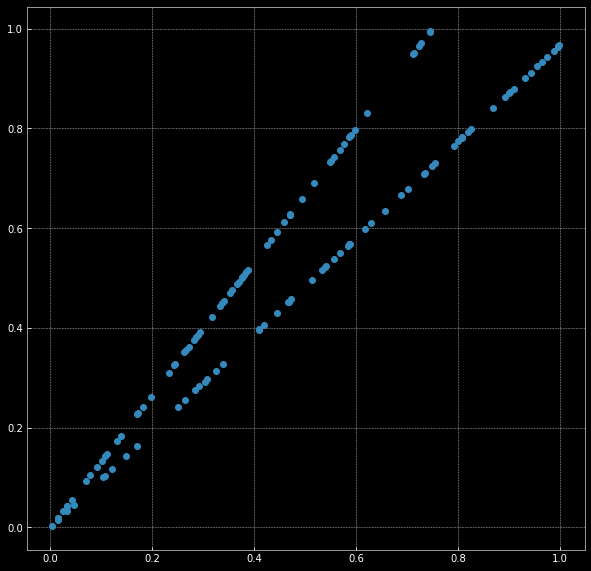

In [287]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_abs.numpy(),'o')

In [288]:
# Define model
model_2H = Linear_2H(input_dim, output_dim).to(device)

In [289]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.5078453421592712
Epoch 100 loss: 0.5078447461128235
Epoch 200 loss: 0.5078441500663757
Epoch 300 loss: 0.5078436136245728
Epoch 400 loss: 0.507843017578125
Epoch 500 loss: 0.507842481136322
Epoch 600 loss: 0.5078420042991638
Epoch 700 loss: 0.5078414678573608
Epoch 800 loss: 0.5078409910202026
Epoch 900 loss: 0.5078404545783997
Epoch 1000 loss: 0.5078399777412415
Epoch 1100 loss: 0.507839560508728
Epoch 1200 loss: 0.5078390836715698
Epoch 1300 loss: 0.5078386068344116
Epoch 1400 loss: 0.5078381896018982
Epoch 1500 loss: 0.5078377723693848
Epoch 1600 loss: 0.5078373551368713
Epoch 1700 loss: 0.5078369379043579
Epoch 1800 loss: 0.5078365802764893
Epoch 1900 loss: 0.5078361630439758
Epoch 2000 loss: 0.5078358054161072
Epoch 2100 loss: 0.5078353881835938
Epoch 2200 loss: 0.5078350305557251
Epoch 2300 loss: 0.5078346729278564
Epoch 2400 loss: 0.5078343749046326
Epoch 2500 loss: 0.5078340172767639
Epoch 2600 loss: 0.5078336596488953
Epoch 2700 loss: 0.5078333616256714
Epoch 2

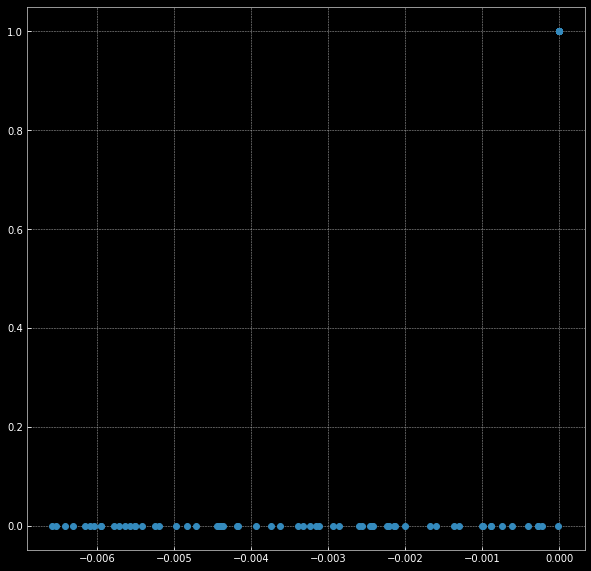

In [290]:
# Plot predictions vs actual data
plot(y_pred.numpy(), y_hs.numpy(),'o')

### 3.4. Which of the models stopped early and on what data?
Please list the experiments where the `loss_threshold` of 1e-2 was reached early. 

List:    [ Linear_2H model when training Absolute data, 
            Linear_1H model when training Absolute data]